# Project: Restaurant Success Classification


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#datasplit">Data Split</a></li>
<li><a href="#datascaling">Data Scaling</a></li>
<li><a href="#BM">Base Model</a></li>
<li><a href="#HPT">Hyper paramter tuning</a></li>
<li><a href="#finalmodel">Final Model</a></li>
</ul>

<a id='intro'></a>
## Introduction

Mr.Adham wants to open a new successful resturant, but didn't know what makes a resturant successful. so he started to collect some data from various sources of possible competitors.

he manged to collect some data and now needs your help to classify if the restaurant will be successfull or not!

- 'url' the url of the online review and information about a restaurant
- 'address' restaurant's address.
- 'name' the name of restaurant.
- 'online_order' does the restaurant supports online order or not?.
- 'book_table' does the restaurant supports booking a table or not?.
- 'rate' the rate of the restaurant on zomato website.
- 'votes' number of votes to rate the restaurant.
- 'phone' phone number of the restaurant.
- 'location' the location of restaurant.
- ‘rest_type’ restaurant type.
- ‘dish_liked’ names of dishs liked by cutomers.
- ‘cuisines’ type of cuisines.
- ‘approx_cost(for two people)’ approximate cost for two.
- ‘reviews_list’ list or commented reviews.
- ‘menu_item’ name of items on the menu.
- ‘listed_in(type)’ listed in type.
- ‘listed_in(city)’ listed in city.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import traceback

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,r2_score,make_scorer

sns.set(rc={'figure.figsize': [16, 16]}, font_scale=1.2)

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv("../input/restaurant-data/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
df[df["votes"] == 0]["rate"].isna().sum()

7731

In [5]:
df[df["votes"] == 0].head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500,[],[],Delivery,Banashankari
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",NaN,South Indian,400,[],[],Delivery,Banashankari


### drop columns that we won't use
because it won't be unique enough and won't make a good use in our model or in our analysis

In [6]:
df["address"].nunique()

11495

In [7]:
df["name"].nunique()

8792

In [8]:
df["phone"].nunique()

14926

In [9]:
df.drop(["url","name","phone","reviews_list","address"],inplace=True,axis = 1)

In [10]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

i would like to drop nan values in ["rest_type", "cuisines", "approx_cost(for two people)"], since there are really few of them which can make up to 1% of the data.

so dropping them won't make our model under fit

In [11]:
df.dropna(subset=["rest_type", "cuisines"],inplace=True)

obviously dish liked column have way too much nan values, and we cannot simple impute that much of data, specially that it makes up 46% of remaining data.

but i will keep it for now, because i would like to introduce an assumption about how important would this feature will take a part in our model if it wouldn't contain many nan values.

In [12]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51466 non-null  object
 1   book_table                   51466 non-null  object
 2   rate                         43780 non-null  object
 3   votes                        51466 non-null  int64 
 4   location                     51466 non-null  object
 5   rest_type                    51466 non-null  object
 6   dish_liked                   23569 non-null  object
 7   cuisines                     51466 non-null  object
 8   approx_cost(for two people)  51148 non-null  object
 9   menu_item                    51466 non-null  object
 10  listed_in(type)              51466 non-null  object
 11  listed_in(city)              51466 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.1+ MB


In [14]:
menuItemsList = []
def extractMenuItems(items):
    for item in items:
        if item.strip() not in menuItems:
            menuItems.append(item.strip())
            
restTypesList = []
def extractRestTypes(restTypes):
    try:
        restTypes = restTypes.split(",")
        for restType in restTypes:
            if restType.strip() not in restTypesList:
                restTypesList.append(restType.strip())
    except:
        print(restTypes)
        return

    
cuisinesList = []
def extractCuisines(cuisines):
    try:
        cuisines = cuisines.split(",")
        for cuisine in cuisines:
            if cuisine.strip() not in cuisinesList:
                cuisinesList.append(cuisine.strip())
    except:
        print(cuisines)
        return

def reformatCuisinesCol(cuisines):
    try:
        values = [word.strip() for word in cuisines.split(",")]
        return values
    except Exception:
        traceback.print_exc()
        print(cuisines)
        return
    
def reformatApproxCostCol(value):
    try:
        return int(value.replace(",",""))
    except:
        return value

    
def reformatRateCol(value):
    try:
        if value == "NEW" or value == "-":
            return 0
        else:
            return float(value.split("/")[0])
    except:
        return 
   
        
def reformatRestTypes(values):
    try:
        values = [word.strip() for word in values.split(",")]
        return values
    except:
        print(values)
        return
    
def getNumberOfDishLiked(dishes):
    try:
        return len(dishes.split(","))
    except:
        return
    
def getRateName(rate):
    if rate > 3.75:
        return "successful"
    else:
        return "not successful"
    

In [15]:
df["cuisines"].apply(lambda x: extractCuisines(x))
cuisinesList, len(cuisinesList)

(['North Indian',
  'Mughlai',
  'Chinese',
  'Thai',
  'Cafe',
  'Mexican',
  'Italian',
  'South Indian',
  'Rajasthani',
  'Andhra',
  'Pizza',
  'Continental',
  'Momos',
  'Beverages',
  'Fast Food',
  'American',
  'French',
  'European',
  'Bakery',
  'Burger',
  'Desserts',
  'Biryani',
  'Street Food',
  'Rolls',
  'Ice Cream',
  'Healthy Food',
  'Salad',
  'Asian',
  'Korean',
  'Indonesian',
  'Japanese',
  'Goan',
  'Seafood',
  'Kebab',
  'Steak',
  'Mithai',
  'Iranian',
  'Sandwich',
  'Juices',
  'Mangalorean',
  'Vietnamese',
  'Hyderabadi',
  'Bengali',
  'Arabian',
  'BBQ',
  'Tea',
  'Afghani',
  'Lebanese',
  'Finger Food',
  'Tibetan',
  'Charcoal Chicken',
  'Middle Eastern',
  'Mediterranean',
  'Wraps',
  'Kerala',
  'Oriya',
  'Bihari',
  'Roast Chicken',
  'Maharashtrian',
  'Bohri',
  'African',
  'Nepalese',
  'Turkish',
  'Tamil',
  'Tex-Mex',
  'Belgian',
  'Gujarati',
  'South American',
  'Konkan',
  'Drinks Only',
  'Awadhi',
  'Chettinad',
  'Coffee'

In [16]:
df["cuisines"] = df["cuisines"].apply(lambda x: reformatCuisinesCol(x))

In [17]:
df["listed_in(type)"].unique(),df["listed_in(type)"].nunique()

(array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
        'Drinks & nightlife', 'Pubs and bars'], dtype=object),
 7)

In [18]:
df["location"].unique(),len(df["location"].unique())

(array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
        'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
        'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
        'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
        'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
        'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
        'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
        'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
        'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
        'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
        'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
        'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
        'Shivajinagar', 'Infantry Road', 'St. Marks Road',
        'Cunningham Road', 'Race Course Road', 'Commercial Street',
        'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura'

In [19]:
cities = df["listed_in(city)"].unique()
cities,len(cities)

(array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
        'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
        'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
        'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
        'Koramangala 4th Block', 'Koramangala 5th Block',
        'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
        'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
        'Old Airport Road', 'Rajajinagar', 'Residency Road',
        'Sarjapur Road', 'Whitefield'], dtype=object),
 30)

In [20]:
df["rest_type"].apply(lambda value: extractRestTypes(value))
restTypesList,len(restTypesList)

(['Casual Dining',
  'Cafe',
  'Quick Bites',
  'Delivery',
  'Mess',
  'Dessert Parlor',
  'Bakery',
  'Pub',
  'Takeaway',
  'Fine Dining',
  'Beverage Shop',
  'Sweet Shop',
  'Bar',
  'Confectionery',
  'Kiosk',
  'Food Truck',
  'Microbrewery',
  'Lounge',
  'Food Court',
  'Dhaba',
  'Club',
  'Irani Cafee',
  'Bhojanalya',
  'Pop Up',
  'Meat Shop'],
 25)

In [21]:
df["rest_type"] = df["rest_type"].apply(lambda value: reformatRestTypes(value))
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,[Casual Dining],"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800,[],Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,[Casual Dining],"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800,[],Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"[Cafe, Casual Dining]","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800,[],Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,[Quick Bites],Masala Dosa,"[South Indian, North Indian]",300,[],Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,[Casual Dining],"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600,[],Buffet,Banashankari


extracting menu items take a lot of time and it's not useful and won't make a diffrence in our analysis, simply because there won't be a specific meal that will make a resturant successful, what make resturant successful is how good his food is + interior, and staff.. etc

In [22]:
#df["menu_item"].apply(lambda menuItemList: extractMenuItems(menuItemList))
#menuItemsList

In [23]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [24]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7686
votes                              0
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)      318
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [25]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda value: reformatApproxCostCol(value))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51466 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51466 non-null  object 
 1   book_table                   51466 non-null  object 
 2   rate                         43780 non-null  object 
 3   votes                        51466 non-null  int64  
 4   location                     51466 non-null  object 
 5   rest_type                    51466 non-null  object 
 6   dish_liked                   23569 non-null  object 
 7   cuisines                     51466 non-null  object 
 8   approx_cost(for two people)  51148 non-null  float64
 9   menu_item                    51466 non-null  object 
 10  listed_in(type)              51466 non-null  object 
 11  listed_in(city)              51466 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


In [27]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7686
votes                              0
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)      318
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [28]:
df['rate'] = df['rate'].apply(lambda value: reformatRateCol(value))

In [29]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7686
votes                              0
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)      318
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

this is an odd observation, we can find a rows that have the following data values:
- in rate column we find a Nan value, but we can also find some reviews in review list column with a rating for each review.

so it does make sense that we should impute the Nan values from review list, right?
no, because we would find in the same row that have Nan value in rate column and some reviews in review list columns, a zero votes in votes column!!

this is weird and could indicate that the data was collected in wrong way, or that votes column have a different meaning.
since we cannot contact the people who collected the dataset, we will go with droping nan values in rate column.
specially that nan values is only 15% from whole dataset, which is okay to drop since that dataset is large enough.

In [30]:
df.dropna(subset=["rate"],inplace=True)

In [31]:
df.dropna(inplace = True, subset =["rest_type"])

In [32]:
df.isnull().sum()

online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     20241
cuisines                           0
approx_cost(for two people)      247
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [33]:
df['online_order'] = df['online_order'].map({"Yes": 1, "No":0})
df['book_table'] = df['book_table'].map({"Yes": 1, "No":0})

# Feature Engineering

In [34]:
df.isna().sum()

online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     20241
cuisines                           0
approx_cost(for two people)      247
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [35]:
df["numberOfCuisines"] = df["cuisines"].apply(lambda cuisines: len(cuisines))
df["numberOfDishLiked"] = df["dish_liked"].apply(lambda dishes: getNumberOfDishLiked(dishes))
df["numberOfMenuItems"] = df["menu_item"].apply(lambda items: len(items.split(",")))
df_corr = df

In [36]:
df = pd.get_dummies(df,columns=["listed_in(type)","listed_in(city)"],dtype= int)
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,4.1,775,Banashankari,[Casual Dining],"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,Banashankari,[Casual Dining],"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,Banashankari,"[Cafe, Casual Dining]","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,Banashankari,[Quick Bites],Masala Dosa,"[South Indian, North Indian]",300.0,[],...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,Basavanagudi,[Casual Dining],"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600.0,[],...,0,0,0,0,0,0,0,0,0,0


In [37]:
mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df['rest_type']),
                index=df.index,
                columns=mlb.classes_))

In [38]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,...,Irani Cafee,Kiosk,Lounge,Meat Shop,Mess,Microbrewery,Pub,Quick Bites,Sweet Shop,Takeaway
0,1,1,4.1,775,Banashankari,[Casual Dining],"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,Banashankari,[Casual Dining],"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,Banashankari,"[Cafe, Casual Dining]","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,Banashankari,[Quick Bites],Masala Dosa,"[South Indian, North Indian]",300.0,[],...,0,0,0,0,0,0,0,1,0,0
4,0,0,3.8,166,Basavanagudi,[Casual Dining],"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600.0,[],...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43780 entries, 0 to 51716
Data columns (total 74 columns):
 #   Column                                 Non-Null Count  Dtype           
---  ------                                 --------------  -----           
 0   online_order                           43780 non-null  int64           
 1   book_table                             43780 non-null  int64           
 2   rate                                   43780 non-null  float64         
 3   votes                                  43780 non-null  int64           
 4   location                               43780 non-null  object          
 5   rest_type                              43780 non-null  object          
 6   dish_liked                             23539 non-null  object          
 7   cuisines                               43780 non-null  object          
 8   approx_cost(for two people)            43533 non-null  float64         
 9   menu_item                              

In [40]:
for col in range(50,74):
    suffix = df.columns[col]
    df.rename(columns={suffix: "rest_type_" + str(df.columns[col])},inplace=True)

In [41]:
mlb = MultiLabelBinarizer(sparse_output=True)
df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df['cuisines']),
                index=df.index,
                columns=mlb.classes_))
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,1,1,4.1,775,Banashankari,[Casual Dining],"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,Banashankari,[Casual Dining],"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800.0,[],...,0,0,0,0,1,0,0,0,0,0
2,1,0,3.8,918,Banashankari,"[Cafe, Casual Dining]","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800.0,[],...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,Banashankari,[Quick Bites],Masala Dosa,"[South Indian, North Indian]",300.0,[],...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,Basavanagudi,[Casual Dining],"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600.0,[],...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43780 entries, 0 to 51716
Columns: 180 entries, online_order to Wraps
dtypes: Sparse[int64, 0](130), float64(3), int64(42), object(5)
memory usage: 19.9+ MB


In [43]:
for col in range(74,180):
    suffix = df.columns[col]
    df.rename(columns={suffix: "cuisines_" + str(df.columns[col])},inplace=True)

In [44]:
for col in df.columns:
    print(col)

online_order
book_table
rate
votes
location
rest_type
dish_liked
cuisines
approx_cost(for two people)
menu_item
numberOfCuisines
numberOfDishLiked
numberOfMenuItems
listed_in(type)_Buffet
listed_in(type)_Cafes
listed_in(type)_Delivery
listed_in(type)_Desserts
listed_in(type)_Dine-out
listed_in(type)_Drinks & nightlife
listed_in(type)_Pubs and bars
listed_in(city)_BTM
listed_in(city)_Banashankari
listed_in(city)_Bannerghatta Road
listed_in(city)_Basavanagudi
listed_in(city)_Bellandur
listed_in(city)_Brigade Road
listed_in(city)_Brookefield
listed_in(city)_Church Street
listed_in(city)_Electronic City
listed_in(city)_Frazer Town
listed_in(city)_HSR
listed_in(city)_Indiranagar
listed_in(city)_JP Nagar
listed_in(city)_Jayanagar
listed_in(city)_Kalyan Nagar
listed_in(city)_Kammanahalli
listed_in(city)_Koramangala 4th Block
listed_in(city)_Koramangala 5th Block
listed_in(city)_Koramangala 6th Block
listed_in(city)_Koramangala 7th Block
listed_in(city)_Lavelle Road
listed_in(city)_MG Road
lis

now we can drop menu item column since we won't need it later on

In [45]:
df.drop(["menu_item"],axis=1, inplace= True)

In [46]:
imputer = SimpleImputer(strategy ='mean')
df[["approx_cost(for two people)"]] = imputer.fit_transform(df[["approx_cost(for two people)"]])

In [47]:
df.isna().sum()

online_order           0
book_table             0
rate                   0
votes                  0
location               0
                      ..
cuisines_Tibetan       0
cuisines_Turkish       0
cuisines_Vegan         0
cuisines_Vietnamese    0
cuisines_Wraps         0
Length: 179, dtype: int64

In [48]:
df["rating_status"] = df["rate"].apply(lambda rate: getRateName(rate))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [49]:
df_corr["rating_status"] = df_corr["rate"].apply(lambda rate: getRateName(rate))

In [50]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),numberOfCuisines,...,cuisines_Tamil,cuisines_Tea,cuisines_Tex-Mex,cuisines_Thai,cuisines_Tibetan,cuisines_Turkish,cuisines_Vegan,cuisines_Vietnamese,cuisines_Wraps,rating_status
0,1,1,4.1,775,Banashankari,[Casual Dining],"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800.0,3,...,0,0,0,0,0,0,0,0,0,successful
1,1,0,4.1,787,Banashankari,[Casual Dining],"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800.0,3,...,0,0,0,1,0,0,0,0,0,successful
2,1,0,3.8,918,Banashankari,"[Cafe, Casual Dining]","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800.0,3,...,0,0,0,0,0,0,0,0,0,successful
3,0,0,3.7,88,Banashankari,[Quick Bites],Masala Dosa,"[South Indian, North Indian]",300.0,2,...,0,0,0,0,0,0,0,0,0,not successful
4,0,0,3.8,166,Basavanagudi,[Casual Dining],"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600.0,2,...,0,0,0,0,0,0,0,0,0,successful


In [51]:
df.isnull().sum()

online_order           0
book_table             0
rate                   0
votes                  0
location               0
                      ..
cuisines_Turkish       0
cuisines_Vegan         0
cuisines_Vietnamese    0
cuisines_Wraps         0
rating_status          0
Length: 180, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

#### CORRELATION BETWEEN FEATURES


Following heatmap shows correlation values between features.

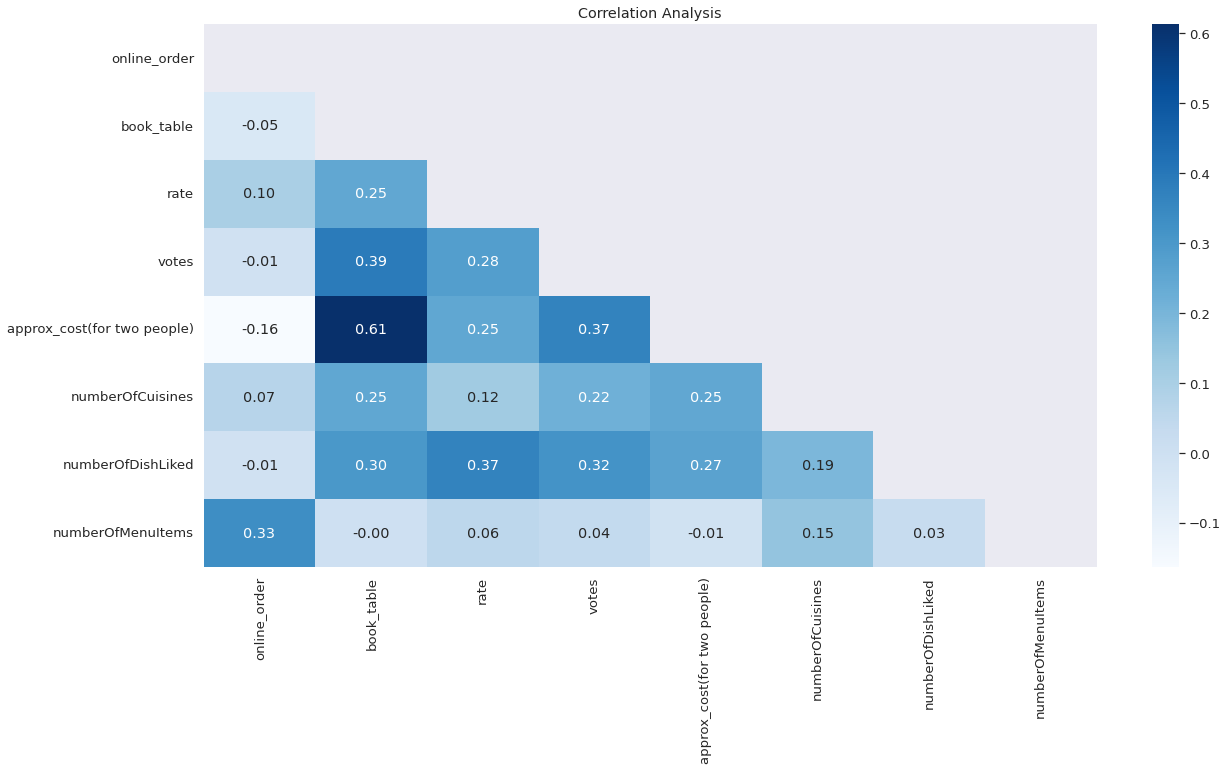

In [52]:
# correlation matrix and heatmap to stand on important features
corr_matrix = df_corr.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, fmt = '0.2f', cmap = 'Blues', mask = mask, annot = True)
plt.title("Correlation Analysis");

#### 1- Number of cuisines and rating status

<AxesSubplot:xlabel='numberOfCuisines', ylabel='Count'>

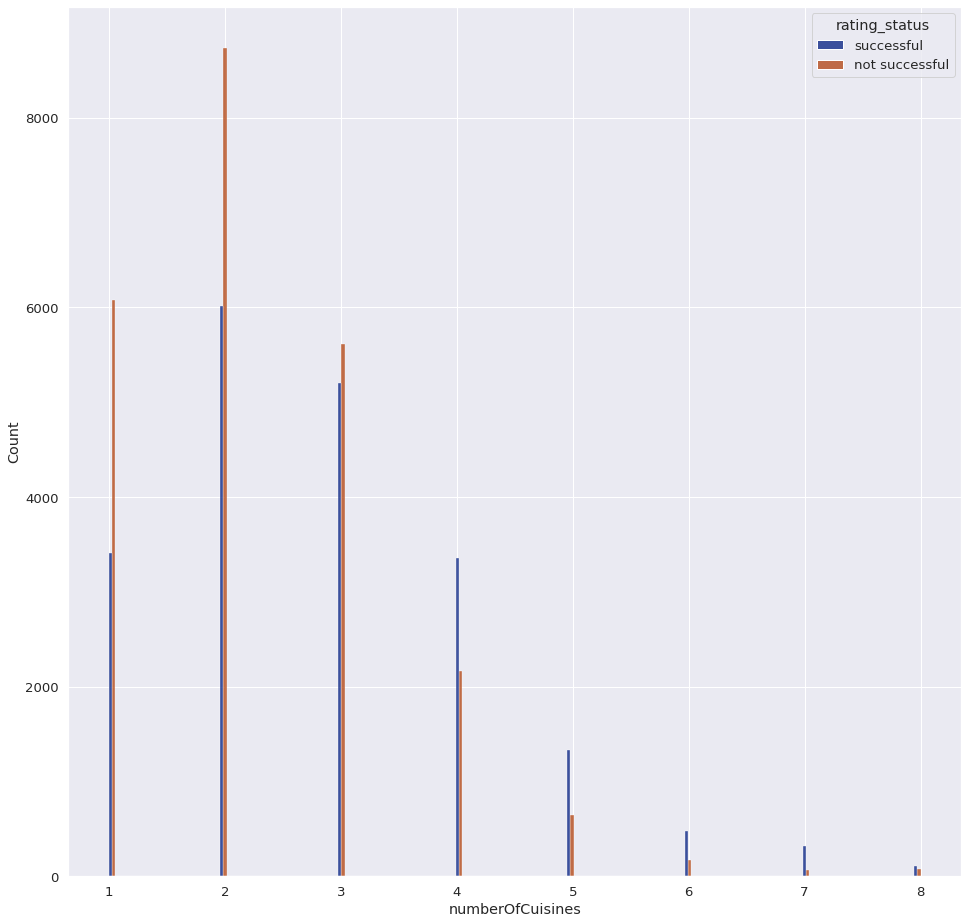

In [53]:
sns.histplot(data=df,x="numberOfCuisines",hue="rating_status",multiple="dodge",palette="dark")

#### 2- Number of dish liked and rating status

<AxesSubplot:xlabel='numberOfDishLiked', ylabel='count'>

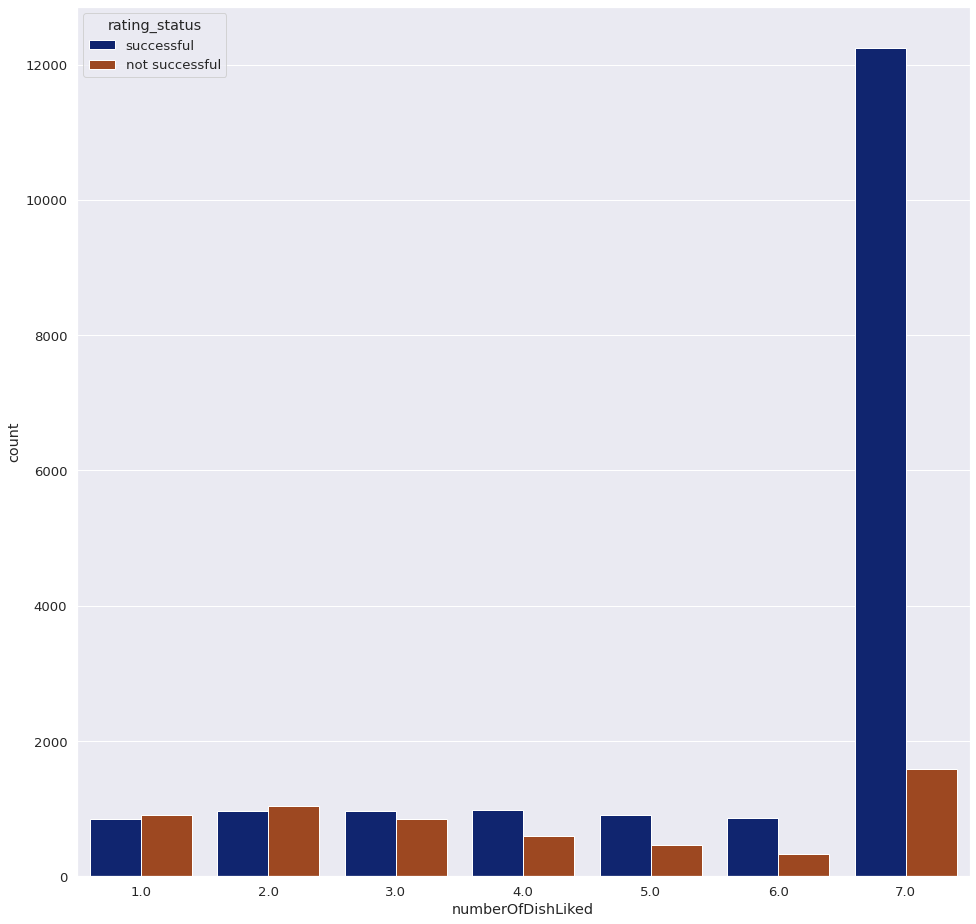

In [54]:
sns.countplot(data=df, x="numberOfDishLiked",hue="rating_status",palette="dark")

#### 3- type of listed in type and rating status

<AxesSubplot:xlabel='listed_in(type)', ylabel='count'>

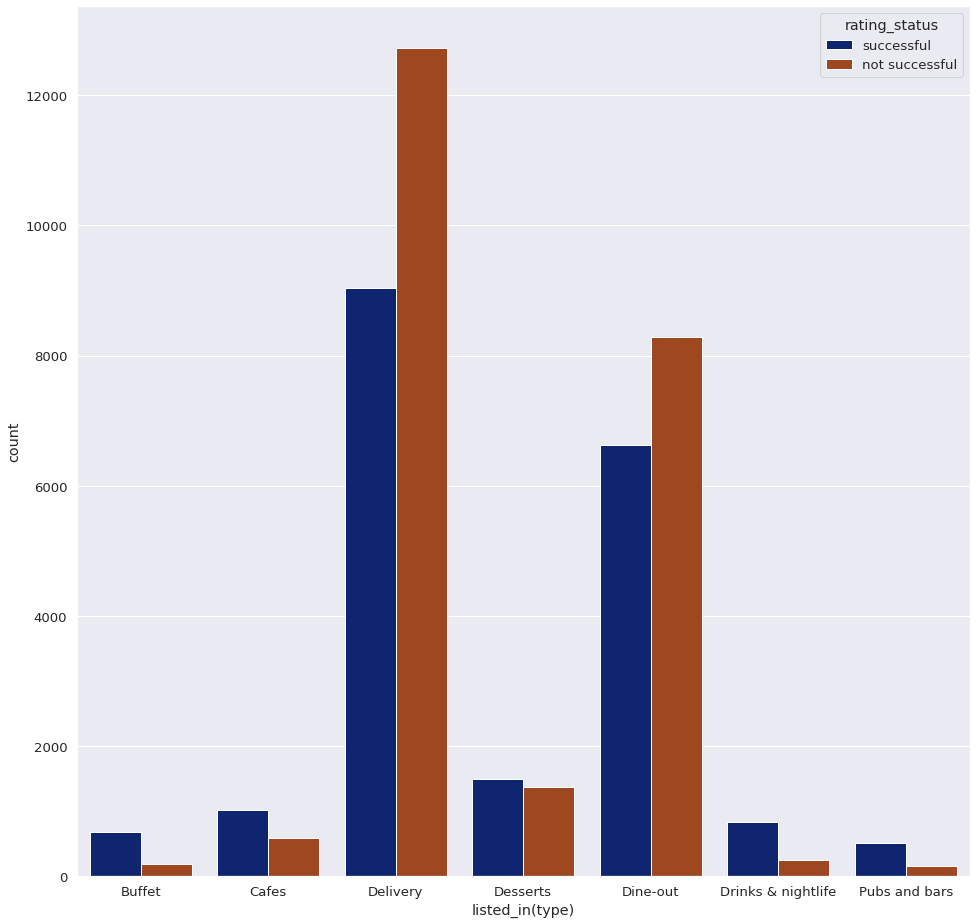

In [55]:
sns.countplot(data=df_corr, x="listed_in(type)",hue="rating_status",palette="dark")

#### 3- approximate cost for two people & Ratting name

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='rating_status'>

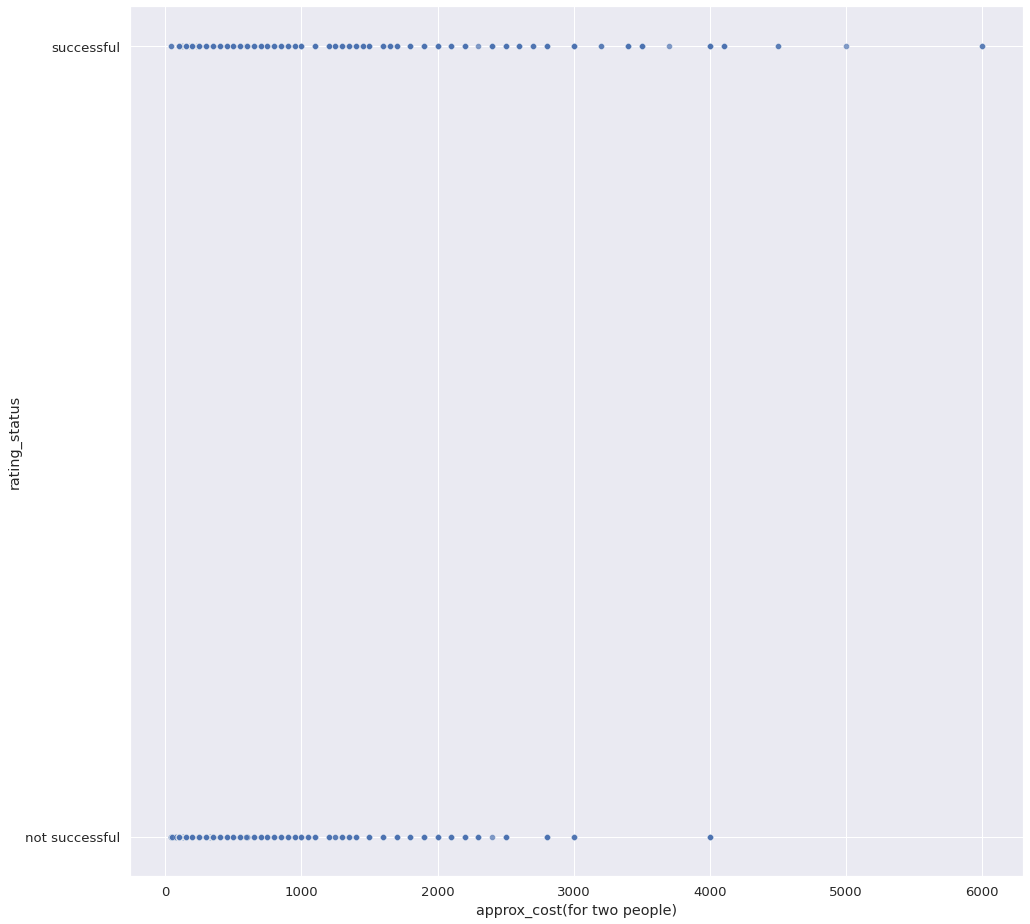

In [56]:
sns.scatterplot(data=df,x='approx_cost(for two people)',y='rating_status',alpha=0.7,palette="dark")

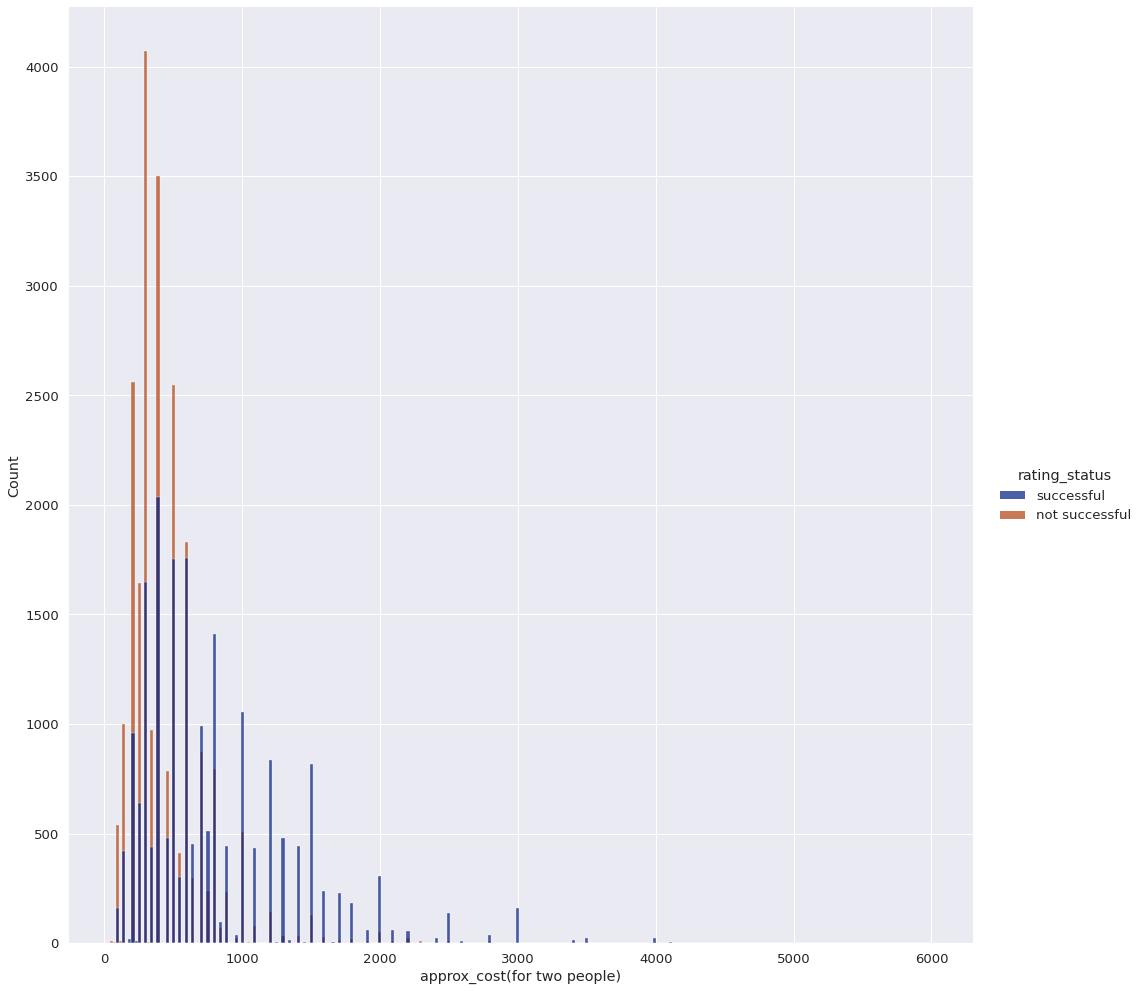

In [57]:
sns.displot(data=df,x='approx_cost(for two people)',hue='rating_status',alpha=0.7,palette="dark",height= 14)

#### 4- avaliblity of online order & rating status

<AxesSubplot:xlabel='online_order', ylabel='count'>

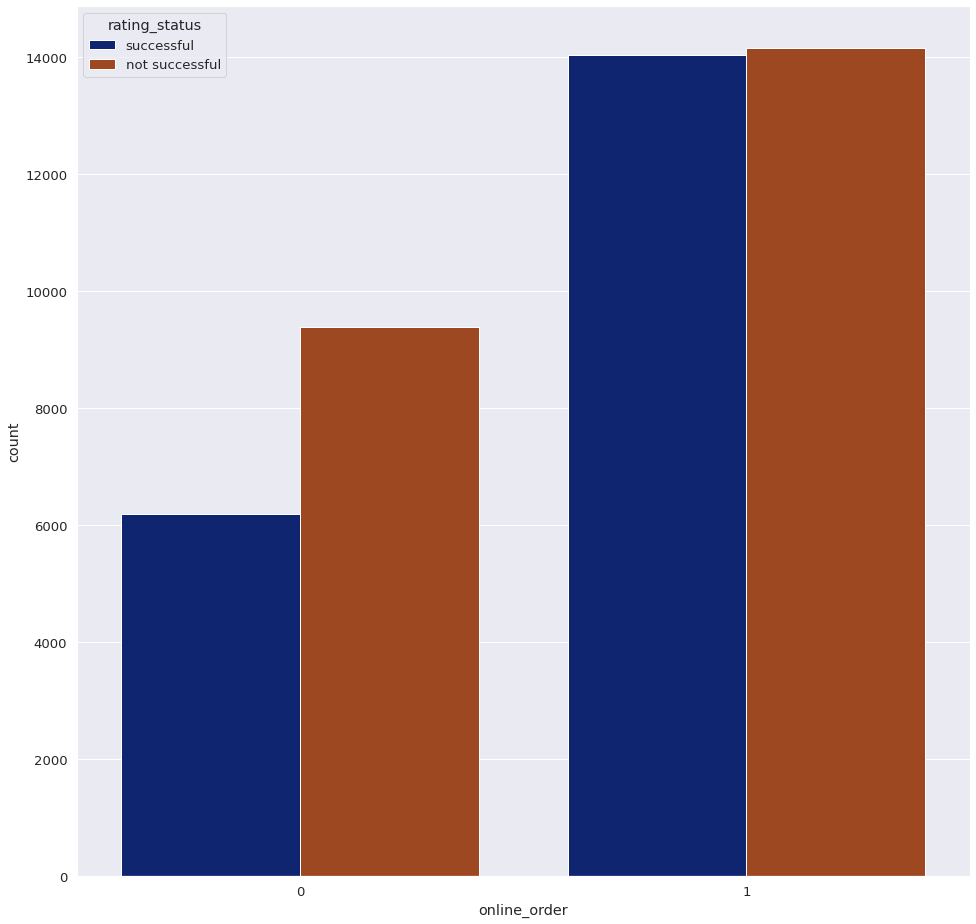

In [58]:
sns.countplot(data=df, x="online_order",hue="rating_status",palette="dark")

#### 5- avaliblity of book table & rating status

<AxesSubplot:xlabel='book_table', ylabel='count'>

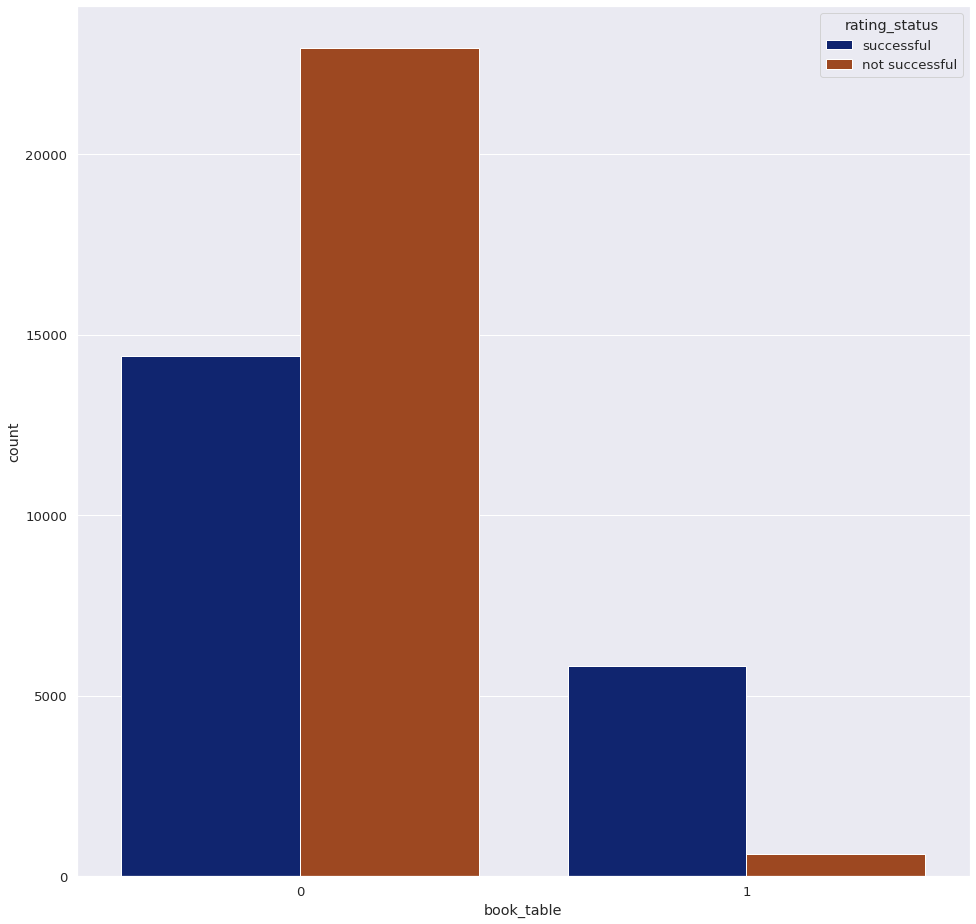

In [59]:
sns.countplot(data=df, x="book_table",hue="rating_status",palette="dark")

#### 6- number of Votes & rating status

<AxesSubplot:xlabel='votes', ylabel='rating_status'>

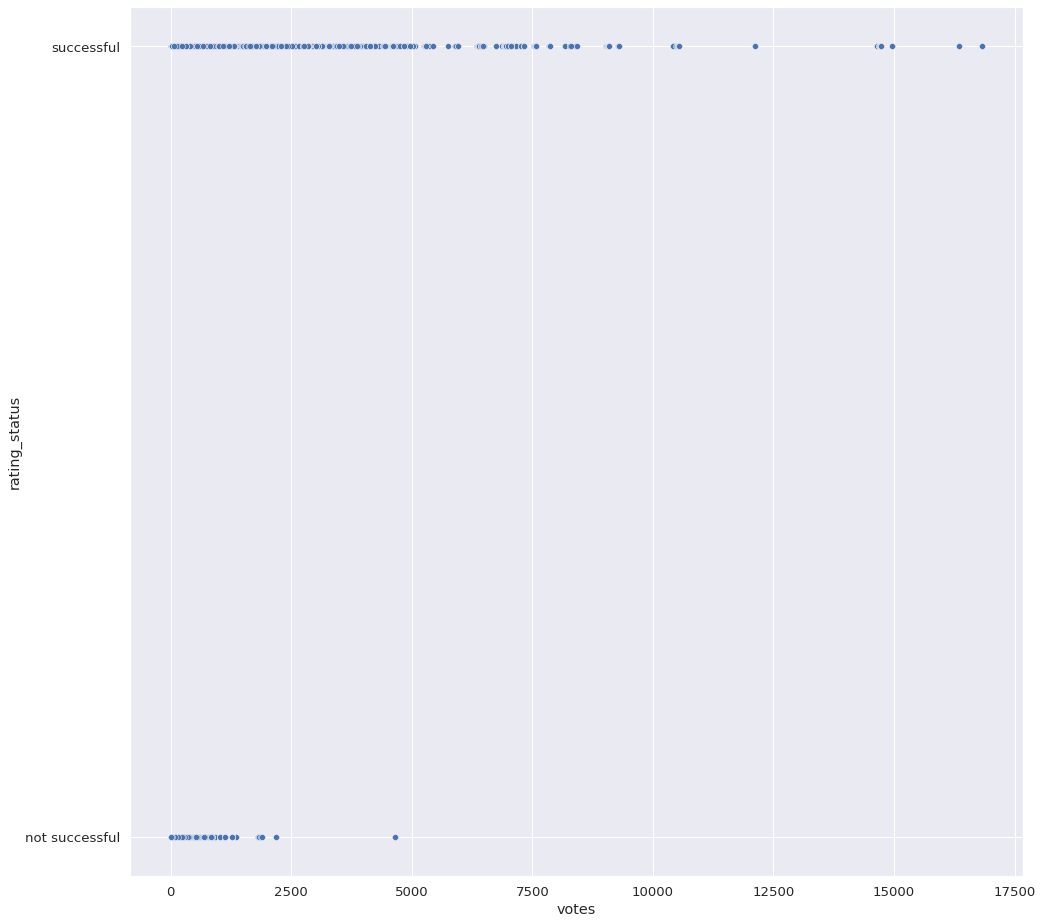

In [60]:
sns.scatterplot(data=df, x="votes",y="rating_status",palette="dark")

<AxesSubplot:xlabel='votes', ylabel='Count'>

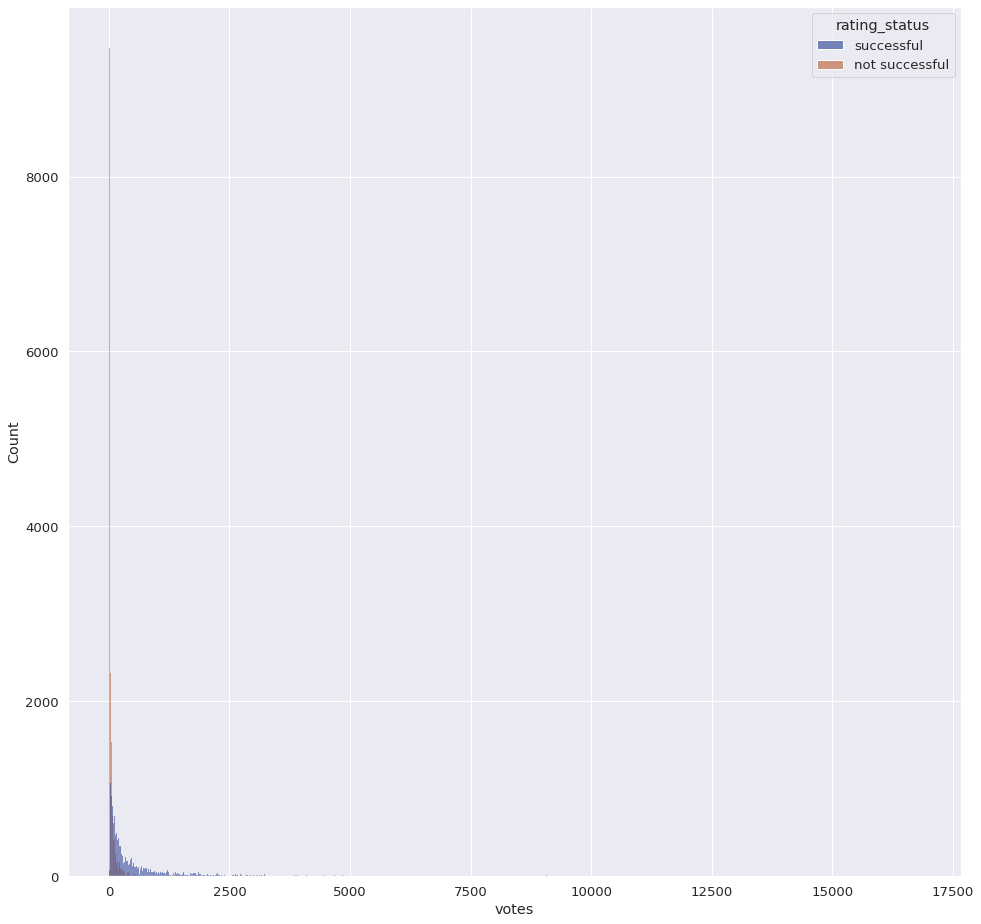

In [61]:
sns.histplot(data=df, x="votes",hue="rating_status",palette="dark")

<a id='datasplit'></a>

## Data Split

In [62]:
x = df.drop(["rate","rating_status","location","numberOfMenuItems","dish_liked","numberOfDishLiked","rest_type","cuisines"],axis=1)
y = df["rating_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1)

<a id='datascaling'></a>

# Data scaling

In [63]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


<a id='BM'></a>

## Modeling - base model

In [64]:
Models = {
    "Logestic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBboost":XGBClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Bagging Boost":BaggingClassifier()
}
#    "support Vector Classifier":SVC(),


In [65]:
for name, model in Models.items() :
    print(name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    ## score 
    print("Traning Accuracy Score: ", accuracy_score(y_train, model.predict(x_train),)*100)
    print("Traning Recall Score: ", recall_score(y_train, model.predict(x_train),average="macro")*100)
    print("Traning Precision Score: ",precision_score(y_train, model.predict(x_train),average="macro")* 100)
    print("_"*10)
    print("Validation Accuracy Score: ", accuracy_score(y_test, y_pred,)*100)
    print("Validation Recall Score: ", recall_score(y_test, y_pred,average="macro")*100)
    print("Validation Precision Score: ",precision_score(y_test, y_pred,average="macro")* 100)
    print("_"*50)
    
print('Finished')

Logestic Regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Traning Accuracy Score:  81.20717222476016
Traning Recall Score:  80.52562386803612
Traning Precision Score:  82.0858879195421
__________
Validation Accuracy Score:  80.91594335312928
Validation Recall Score:  80.05237650400704
Validation Precision Score:  81.78029532106183
__________________________________________________
Decision Tree
Traning Accuracy Score:  99.97715851987209
Traning Recall Score:  99.97536490731048
Traning Precision Score:  99.97871774408087
__________
Validation Accuracy Score:  94.98629511192325
Validation Recall Score:  94.93561720586956
Validation Precision Score:  94.95603015075376
__________________________________________________
Random Forest
Traning Accuracy Score:  99.97715851987209
Traning Recall Score:  99.9766188226447
Traning Precision Score:  99.97745504462104
__________
Validation Accuracy Score:  94.16400182731842
Validation Recall Score:  94.01120254044844
Validation Precision Score:  94.22584204235496
____________________________________________

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['not successful' 'successful']

<a id='HPT'></a>

## Bagging Boost - Hyper paramter tuning

we can further imporve our model accuracy by trying out different paramaters to our model.

In [ ]:
"""
bagging_model = BaggingClassifier()

#Setting values for the parameters
n_estimators = [10, 20, 30]
max_samples = [1, 2, 3]
max_features = [1, 2, 3]

#Creating a dictionary for the hyper parameters
hyper_parameters = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagging_model, hyper_parameters, cv = 5)
bestbag = gridbag.fit(x_train, y_train)

"""


here we can find the best paramters with highest scoring accuracy

In [ ]:
#bestbag.best_params_

<a id='finalmodel'></a>

## Build our final model

In [ ]:
#bagging_model = BaggingClassifier( n_estimators=30, max_samples=3, max_features= 3)
bagging_model = BaggingClassifier()

bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)
    
## score 
print("Traning Accuracy Score: ", accuracy_score(y_train, model.predict(x_train),)*100)
print("Traning Recall Score: ", recall_score(y_train, model.predict(x_train),average="macro")*100)
print("Traning Precision Score: ",precision_score(y_train, model.predict(x_train),average="macro")* 100)
print("_"*10)
print("Validation Accuracy Score: ", accuracy_score(y_test, y_pred,)*100)
print("Validation Recall Score: ", recall_score(y_test, y_pred,average="macro")*100)
print("Validation Precision Score: ",precision_score(y_test, y_pred,average="macro")* 100)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,12))

sns.heatmap(cm, annot = True, fmt = '.1f' )

In [ ]:
import joblib

In [ ]:
joblib.dump(bagging_model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')
joblib.dump(x.columns, 'features.h5')

In [ ]:
bagging_model.predict([[1, 1, 300, 2000.0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
, 0, 0, 0, 0, 0,]])

In [ ]:
list_of_listed_in_cities = []
for col in range(12,42):
    print(x.columns[col])
    list_of_listed_in_cities.append(x.columns[col].split("_")[2])
list_of_listed_in_cities,len(list_of_listed_in_cities)

In [ ]:
list_of_rest_types = []
for col in range(42,66):
    list_of_rest_types.append(x.columns[col].split("_")[2])
list_of_rest_types,len(list_of_rest_types)

In [ ]:
list_of_cuisines = []
for col in range(66,172):
    list_of_cuisines.append(x.columns[col].split("_")[1])
list_of_cuisines,len(list_of_cuisines)